In [38]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("../data/UsersWithCountry.csv")


In [30]:
df.head(10)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,LocationCountry
0,-1,1,2010-11-01T17:53:28.330,Community,2010-11-01T17:53:28.330,http://meta.stackexchange.com/,on the server farm,"Hi, I'm not really a person. I'm a background...",4642,0,0,-1.0,NaN
1,2,101,2010-11-01T19:19:09.697,Geoff Dalgas,2023-10-03T00:34:53.647,http://stackoverflow.com,"corvallis, or",Dev #2 who helped create Stack Overflow curren...,108,5,0,2.0,united states
2,3,101,2010-11-01T22:25:38.390,Jin,2019-08-30T05:08:29.010,http://www.8164.org,"raleigh, nc",I used to design stuff for Stack Exchange. Als...,68,24,0,21721.0,united states
3,4,6907,2010-11-01T23:01:40.147,Jonathan.,2023-07-24T00:16:54.763,http://jonathanb.co.uk,united kingdom,"I'm a 25 year old Software engineer in London,...",1354,45,3,64959.0,united kingdom
4,5,101,2010-11-02T03:56:21.077,Jason Punyon,2023-07-22T19:42:25.617,https://jasonpunyon.com,restore the data dumps,Chaotic Good w a splash of Data. Dad x2. Stack...,38,0,0,4188.0,NaN
5,6,141,2010-11-02T18:49:10.520,ahh,2024-01-09T11:28:38.320,NaN,NaN,NaN,43,2,1,35180.0,NaN
6,7,1397,2010-11-02T18:49:25.130,Nick,2021-12-31T20:58:58.910,http://www.nickoneill.name,"san francisco, ca","Ugh, another bio field. Currently That Thing ...",142,33,0,5614.0,united states
7,8,474,2010-11-02T18:50:11.503,Jamie Banks,2016-09-07T00:53:08.147,http://verbaltopology.wordpress.com,"brooklyn, ny, united states","Interested in: languages and linguistics, neur...",246,74,1,235636.0,united states
8,9,101,2010-11-02T18:50:50.327,8128,2017-12-13T17:36:23.343,NaN,"oxford, united kingdom",Hello world.,22,2,0,1149.0,united kingdom
9,11,2272,2010-11-02T18:51:04.367,Tim Goodman,2023-10-31T21:31:55.773,NaN,NaN,NaN,570,167,0,92888.0,NaN


In [42]:
LocationCountry = df["LocationCountry"]
counts = LocationCountry.value_counts().sort_values(ascending = False)
total = LocationCountry.count()
print(total)
print(counts.head(30))

56553
LocationCountry
united states                15628
india                         8024
united kingdom                4636
germany                       2897
canada                        2318
australia                     1522
france                        1362
brazil                         974
netherlands                    972
italy                          823
china                          788
spain                          684
sweden                         663
switzerland                    648
poland                         609
russian federation             534
bangladesh                     508
israel                         468
pakistan                       462
turkey                         441
belgium                        425
viet nam                       405
iran, islamic republic of      395
japan                          381
singapore                      367
norway                         358
denmark                        345
south africa                   33

Location such as: east bay, ♁, https://www.gofundme.com/f/stop-stack-overflow-from-defaming-its-users, dilaton@physicsoverflow.org. Get's filtered out, which is why 66479 - 56553 =9 926 rows get's removed as a form of cleaning from the data.

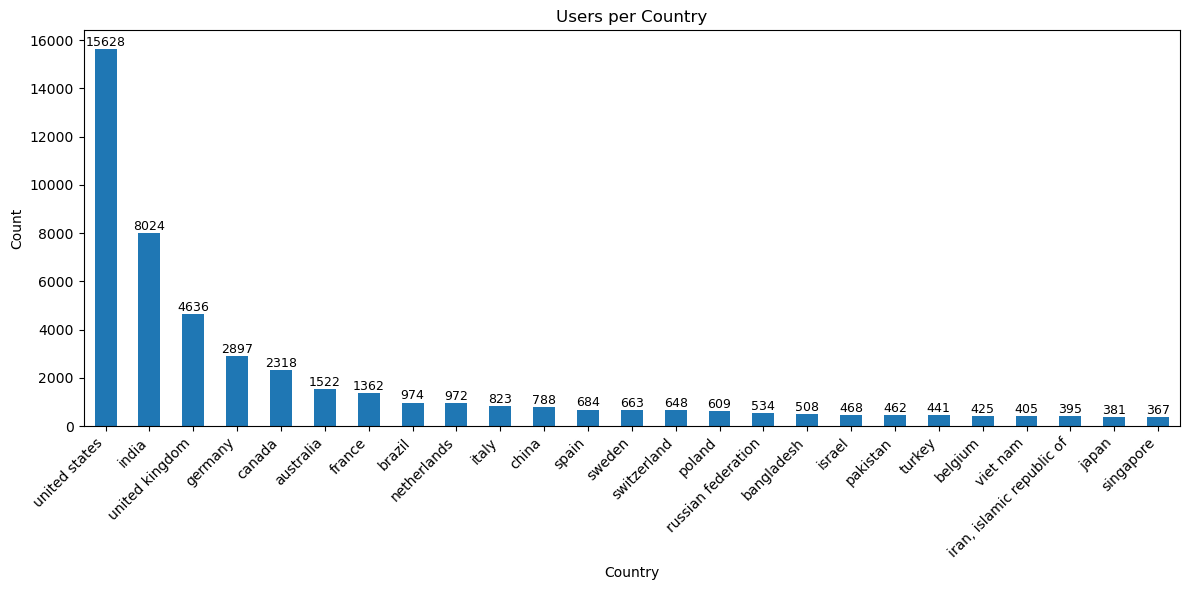

In [43]:
counts = df["LocationCountry"].value_counts().sort_values(ascending=False)
counts = counts.head(25)
ax = counts.plot(kind="bar", figsize=(12, 6))
plt.title("Users per Country")
plt.ylabel("Count")
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")

# Add count labels
for i, val in enumerate(counts):
    ax.text(i, val + 1, str(val), ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

# Visualise changes in country over time:

In [47]:
df["CreationDate"] = pd.to_datetime(df["CreationDate"])
df["Year"] = df["CreationDate"].dt.year

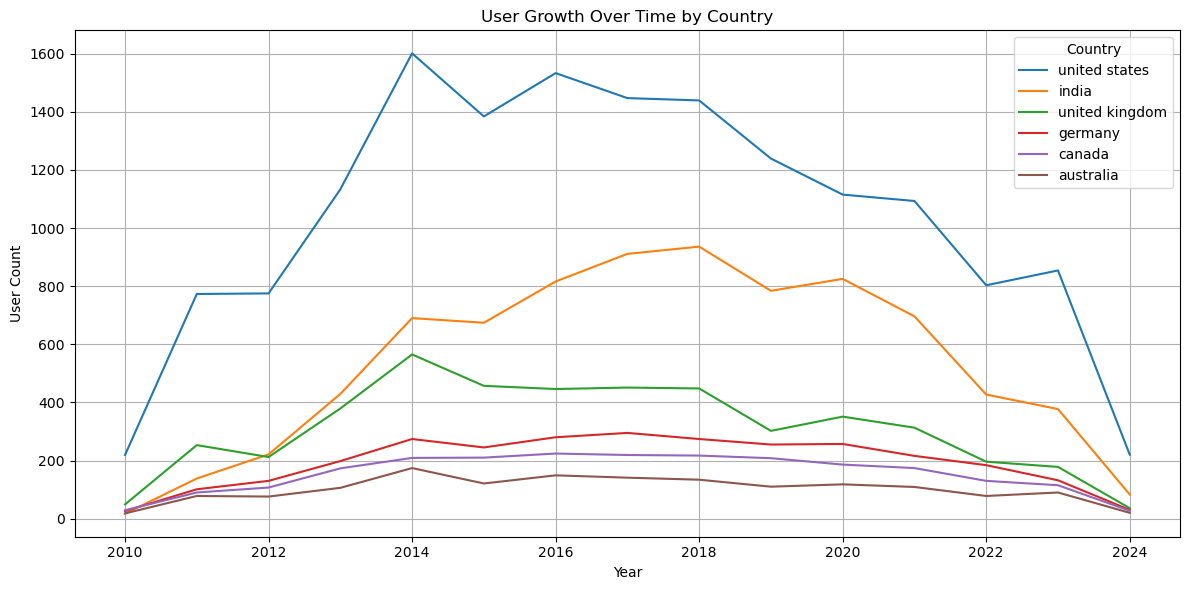

In [50]:
country_year = df.groupby(["Year", "LocationCountry"]).size().unstack(fill_value=0)

top_countries = df["LocationCountry"].value_counts().head(6).index

# Plot only those
country_year[top_countries].plot(figsize=(12, 6))

plt.title("User Growth Over Time by Country")
plt.xlabel("Year")
plt.ylabel("User Count")
plt.grid(True)
plt.legend(title="Country")
plt.tight_layout()
plt.show()

# Account lifetime

In [75]:
df["CreationDate"] = pd.to_datetime(df["CreationDate"])
df["LastAccessDate"] = pd.to_datetime(df["LastAccessDate"])
df["AccountLifetimeDays"] = (df["LastAccessDate"] - df["CreationDate"]).dt.days
df["AccountLifetimeYears"] = df["AccountLifetimeDays"] / 365
# split the data
under_1_year = df[df["AccountLifetimeYears"] < 1]
over_1_year = df[df["AccountLifetimeYears"] >= 1]

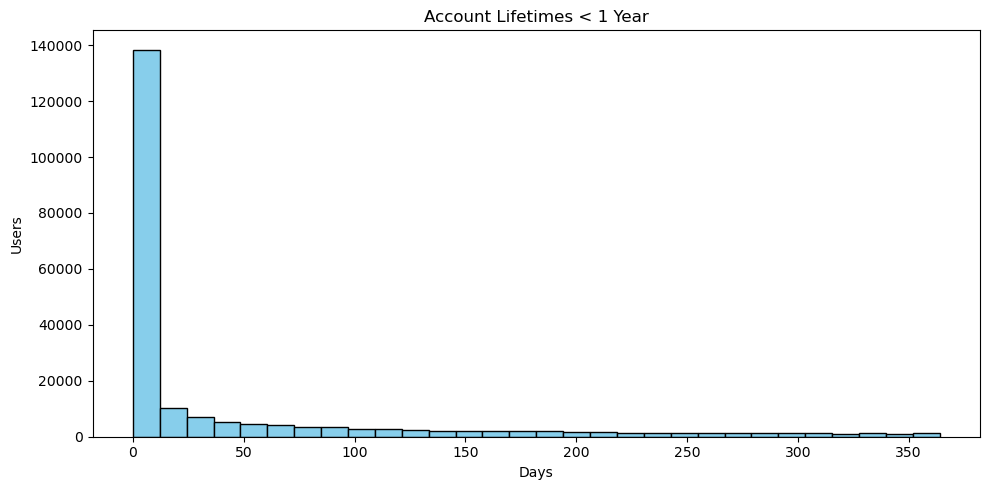

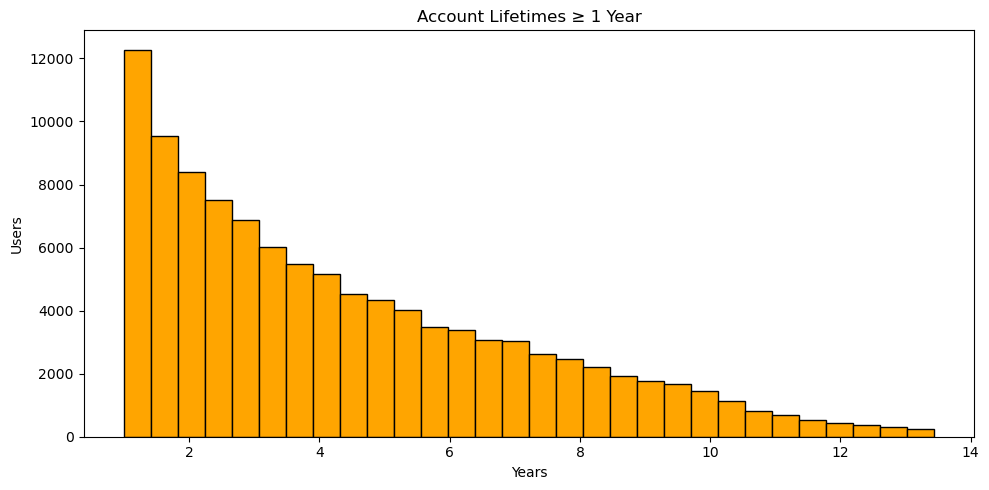

In [86]:
plt.figure(figsize=(10, 5))
under_1_year["AccountLifetimeDays"].plot.hist(
    bins=30, edgecolor="black", color="skyblue"
)
plt.title("Account Lifetimes < 1 Year")
plt.xlabel("Days")
plt.ylabel("Users")
plt.tight_layout()
plt.show()

# Plot for ≥ 1 year
plt.figure(figsize=(10, 5))
over_1_year["AccountLifetimeYears"].plot.hist(
    bins=30, edgecolor="black", color="orange"
)
plt.title("Account Lifetimes ≥ 1 Year")
plt.xlabel("Years")
plt.ylabel("Users")
plt.tight_layout()
plt.show()